In [57]:
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
import string
from nltk.stem.snowball import SnowballStemmer
import re
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from wordcloud import WordCloud
from sklearn.metrics import accuracy_score 
import pickle
%matplotlib inline

In [33]:
## only need to remove punctuation and stemize
stemmer = SnowballStemmer('english')

def stem_tokens(tokens, stemmer):
    stemmed = []
    for item in tokens:
        stemmed.append(stemmer.stem(item))
    return stemmed

def tokenize(text):
    text = "".join([ch for ch in text if ch not in string.punctuation])
    tokens = nltk.word_tokenize(text)
    stems = stem_tokens(tokens, stemmer)
    return stems

## remove special symbol
def rm_sym(df):
    df['review'] = df['review'].str.replace("&#039;",'\'')
    df['review'].head()
    df['rating_cate'] = ''
    df.loc[df['rating'] >= 7,'rating_cate'] = 'high'
    df.loc[df['rating'] <= 4,'rating_cate'] = 'low'
    df.loc[(df['rating'] > 4) & (df['rating'] < 7),'rating_cate'] = 'medium'
    return df

df = pd.read_csv('drugsCom_raw/drugsComTrain_raw.tsv',sep='\t',index_col=0)
df['date'] = pd.to_datetime(df['date'])
df = rm_sym(df)

## Generate table of words with their counts
con_vec = TfidfVectorizer(stop_words='english',tokenizer=tokenize)
X_train = con_vec.fit_transform(df['review'])
#target_3 = pd.get_dummies(df_tem['rating_cate'])
X_train = pd.DataFrame(X_train.toarray(),columns=con_vec.get_feature_names())
y_train = df['rating_cate']


test = pd.read_csv("drugsCom_raw/drugsComTest_raw.tsv",sep='\t', index_col=0)
test = rm_sym(test)
X_test = con_vec.transform(test['review'])
X_test = pd.DataFrame(X_test.toarray(),columns=con_vec.get_feature_names())
y_test = test['rating_cate']

## Buiding model
lr = LogisticRegression(penalty='l1',multi_class='auto',solver='saga',n_jobs=-1)
lr.fit(X_train,y_train)

y_test_predict = lr.predict(X_test)

accu_score = accuracy_score(y_test,y_test_predict)

with open("accuracy_score_test.txt", 'w') as outfile:
    outfile.write(str(accu_score))
    
# save the model to disk

pickle.dump(con_vec, open("1st_tfidf.sav", 'wb'))
pickle.dump(lr, open("1st_lr.sav", 'wb'))

KeyboardInterrupt: 

In [37]:


with open('1000_accuracy_score_test.txt') as f:
    print(f.read())
    

0.6805230071048618


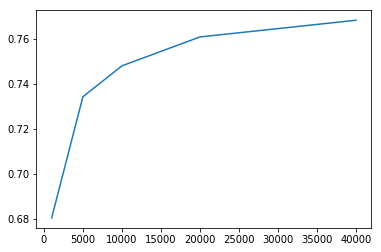

In [59]:
files = !ls *_accuracy_score_test.txt
files = sorted(files,key=lambda x: int(x.split("_")[0]))

scores = []
for each in files:
    with open(each) as f:
        scores.append(float(f.read()))

        
iterations = [int(a.split("_")[0]) for a in files]

plt.plot(iterations,scores)

In [62]:
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
import string
from nltk.stem.snowball import SnowballStemmer
import re
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from wordcloud import WordCloud
from sklearn.metrics import accuracy_score 
import pickle
from sklearn.ensemble import GradientBoostingClassifier

## only need to remove punctuation and stemize
stemmer = SnowballStemmer('english')

def stem_tokens(tokens, stemmer):
    stemmed = []
    for item in tokens:
        stemmed.append(stemmer.stem(item))
    return stemmed

def tokenize(text):
    text = "".join([ch for ch in text if ch not in string.punctuation])
    tokens = nltk.word_tokenize(text)
    stems = stem_tokens(tokens, stemmer)
    return stems

## remove special symbol
def rm_sym(df):
    df['review'] = df['review'].str.replace("&#039;",'\'')
    df['review'].head()
    df['rating_cate'] = ''
    df.loc[df['rating'] >= 7,'rating_cate'] = 'high'
    df.loc[df['rating'] <= 4,'rating_cate'] = 'low'
    df.loc[(df['rating'] > 4) & (df['rating'] < 7),'rating_cate'] = 'medium'
    return df

df = pd.read_csv('drugsCom_raw/drugsComTrain_raw.tsv',sep='\t',index_col=0)
df['date'] = pd.to_datetime(df['date'])
df = rm_sym(df)
df_tem2 = df.sample(100)
#df_tem2.groupby('rating_cate').size() / df_tem2.groupby('rating_cate').size().sum()

## Generate table of words with their counts
con_vec = TfidfVectorizer(stop_words='english',tokenizer=tokenize)
X_train = con_vec.fit_transform(df_tem2['review'])
#target_3 = pd.get_dummies(df_tem['rating_cate'])
#X_train = pd.DataFrame(X_train.toarray(),columns=con_vec.get_feature_names())
y_train = df_tem2['rating_cate']

pickle.dump(con_vec, open("gbc_20000_tfidf.sav", 'wb'))

for i in [100,200,300]:
    gbc = GradientBoostingClassifier(n_estimators=i)
    gbc_cv_score = cross_val_score(gbc,X_train,y_train,scoring='accuracy',cv=3,n_jobs=-1)
    pickle.dump(gbc, open("gbc_20000_"+str(i)+"_tfidf.sav", 'wb'))
    with open("gbc_20000_cv.txt", 'w') as outfile:
        outfile.write(str(gbc_cv_score))




/Users/jzz0026/anaconda3/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'cri', 'describ', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'forti', 'henc', 'hereaft', 'herebi', 'howev', 'hundr', 'inde', 'mani', 'meanwhil', 'moreov', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 'pleas', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'themselv', 'thenc', 'thereaft', 'therebi', 'therefor', 'togeth', 'twelv', 'twenti', 'veri', 'whatev', 'whenc', 'whenev', 'wherea', 'whereaft', 'wherebi', 'wherev', 'whi', 'yourselv'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


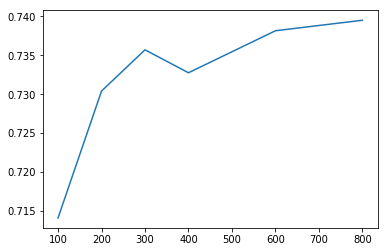

In [99]:
files = !ls AWS/*_cv.txt
files = files[:-1]

scores = []
for each in files:
    with open(each) as f:
        scores.append((f.read()))

cv_scores = [a.lstrip("[").rstrip("]").split(" ") for a in scores]     
cv_scores2 = [np.mean([float(b) for b in a if not b == '']) for a in cv_scores]

n_estim = [int(a.replace("AWS/gbc_20000_","").replace("AWS/gbc_20000","").replace("_cv.txt","")) for a in files]
plt.plot(n_estim,cv_scores2)

In [101]:
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
import string
from nltk.stem.snowball import SnowballStemmer
import re
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from wordcloud import WordCloud
from sklearn.metrics import accuracy_score 
import pickle
from sklearn.ensemble import GradientBoostingClassifier

## only need to remove punctuation and stemize
stemmer = SnowballStemmer('english')

def stem_tokens(tokens, stemmer):
    stemmed = []
    for item in tokens:
        stemmed.append(stemmer.stem(item))
    return stemmed

def tokenize(text):
    text = "".join([ch for ch in text if ch not in string.punctuation])
    tokens = nltk.word_tokenize(text)
    stems = stem_tokens(tokens, stemmer)
    return stems

## remove special symbol
def rm_sym(df):
    df['review'] = df['review'].str.replace("&#039;",'\'')
    df['review'].head()
    df['rating_cate'] = ''
    df.loc[df['rating'] >= 7,'rating_cate'] = 'high'
    df.loc[df['rating'] <= 4,'rating_cate'] = 'low'
    df.loc[(df['rating'] > 4) & (df['rating'] < 7),'rating_cate'] = 'medium'
    return df

df = pd.read_csv('drugsCom_raw/drugsComTrain_raw.tsv',sep='\t',index_col=0)
df['date'] = pd.to_datetime(df['date'])
df = rm_sym(df)
df_tem2 = df.sample(20000)
#df_tem2.groupby('rating_cate').size() / df_tem2.groupby('rating_cate').size().sum()

## Generate table of words with their counts
con_vec = TfidfVectorizer(stop_words='english',tokenizer=tokenize)
X_train = con_vec.fit_transform(df_tem2['review'])
y_train = df_tem2['rating_cate']

## test set
test = pd.read_csv("drugsCom_raw/drugsComTest_raw.tsv",sep='\t', index_col=0)
test = rm_sym(test)
X_test = con_vec.transform(test['review'])
y_test = test['rating_cate']


pickle.dump(con_vec, open("gbc_20000_600_tfidf.sav", 'wb'))


gbc = GradientBoostingClassifier(n_estimators=600)
gbc.fit(X_train,y_train)
y_test_predict = gbc.predict(X_test)
acc = accuracy_score(y_test,y_test_predict)
with open("gbc_20000_600_accuracy.txt", 'w') as outfile:
    outfile.write(str(acc))

pickle.dump(gbc, open("gbc_20000_600_gbc.sav", 'wb'))

[100, 200, 300, 400, 600, 800]

In [105]:
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
import string
from nltk.stem.snowball import SnowballStemmer
import re
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from wordcloud import WordCloud
from sklearn.metrics import accuracy_score 
import pickle
from sklearn.svm import SVC


## only need to remove punctuation and stemize
stemmer = SnowballStemmer('english')

def stem_tokens(tokens, stemmer):
    stemmed = []
    for item in tokens:
        stemmed.append(stemmer.stem(item))
    return stemmed

def tokenize(text):
    text = "".join([ch for ch in text if ch not in string.punctuation])
    tokens = nltk.word_tokenize(text)
    stems = stem_tokens(tokens, stemmer)
    return stems

## remove special symbol
def rm_sym(df):
    df['review'] = df['review'].str.replace("&#039;",'\'')
    df['review'].head()
    df['rating_cate'] = ''
    df.loc[df['rating'] >= 7,'rating_cate'] = 'high'
    df.loc[df['rating'] <= 4,'rating_cate'] = 'low'
    df.loc[(df['rating'] > 4) & (df['rating'] < 7),'rating_cate'] = 'medium'
    return df

df = pd.read_csv('drugsCom_raw/drugsComTrain_raw.tsv',sep='\t',index_col=0)
df['date'] = pd.to_datetime(df['date'])
df = rm_sym(df)


def add_sample_svm(n):
    df_tem2 = df.sample(n)
    #df_tem2.groupby('rating_cate').size() / df_tem2.groupby('rating_cate').size().sum()

    ## Generate table of words with their counts
    con_vec = TfidfVectorizer(stop_words='english',tokenizer=tokenize)
    X_train = con_vec.fit_transform(df_tem2['review'])
    y_train = df_tem2['rating_cate']

    ## test set
#     test = pd.read_csv("drugsCom_raw/drugsComTest_raw.tsv",sep='\t', index_col=0)
#     test = rm_sym(test)
#     X_test = con_vec.transform(test['review'])
#     y_test = test['rating_cate']


    #pickle.dump(con_vec, open("svm_lin_20000_tfidf.sav", 'wb'))

    svm_lin = SVC(kernel='linear')
    svm_lin_cv_score = cross_val_score(svm_lin,X_train,y_train,scoring='accuracy',cv=3,n_jobs=-1)
    with open("svm_lin_"+str(n)+"_cv.txt", 'w') as outfile:
        outfile.write(str(svm_lin_cv_score))
        
for n in [10000,20000,40000,80000]:
    add_sample_svm(n)

/Users/jzz0026/anaconda3/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'cri', 'describ', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'forti', 'henc', 'hereaft', 'herebi', 'howev', 'hundr', 'inde', 'mani', 'meanwhil', 'moreov', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 'pleas', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'themselv', 'thenc', 'thereaft', 'therebi', 'therefor', 'togeth', 'twelv', 'twenti', 'veri', 'whatev', 'whenc', 'whenev', 'wherea', 'whereaft', 'wherebi', 'wherev', 'whi', 'yourselv'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


In [107]:
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
import string
from nltk.stem.snowball import SnowballStemmer
import re
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from wordcloud import WordCloud
from sklearn.metrics import accuracy_score 
import pickle
from sklearn.svm import SVC


## only need to remove punctuation and stemize
stemmer = SnowballStemmer('english')

def stem_tokens(tokens, stemmer):
    stemmed = []
    for item in tokens:
        stemmed.append(stemmer.stem(item))
    return stemmed

def tokenize(text):
    text = "".join([ch for ch in text if ch not in string.punctuation])
    tokens = nltk.word_tokenize(text)
    stems = stem_tokens(tokens, stemmer)
    return stems

## remove special symbol
def rm_sym(df):
    df['review'] = df['review'].str.replace("&#039;",'\'')
    df['review'].head()
    df['rating_cate'] = ''
    df.loc[df['rating'] >= 7,'rating_cate'] = 'high'
    df.loc[df['rating'] <= 4,'rating_cate'] = 'low'
    df.loc[(df['rating'] > 4) & (df['rating'] < 7),'rating_cate'] = 'medium'
    return df

df = pd.read_csv('drugsCom_raw/drugsComTrain_raw.tsv',sep='\t',index_col=0)
df['date'] = pd.to_datetime(df['date'])
df = rm_sym(df)


def add_sample_svm(n):
    df_tem2 = df.sample(n)
    #df_tem2.groupby('rating_cate').size() / df_tem2.groupby('rating_cate').size().sum()

    ## Generate table of words with their counts
    con_vec = TfidfVectorizer(stop_words='english',tokenizer=tokenize)
    X_train = con_vec.fit_transform(df_tem2['review'])
    y_train = df_tem2['rating_cate']

    ## test set
#     test = pd.read_csv("drugsCom_raw/drugsComTest_raw.tsv",sep='\t', index_col=0)
#     test = rm_sym(test)
#     X_test = con_vec.transform(test['review'])
#     y_test = test['rating_cate']


    #pickle.dump(con_vec, open("svm_lin_20000_tfidf.sav", 'wb'))

    svm_rbf = SVC(kernel='rbf')
    svm_rbf_cv_score = cross_val_score(svm_rbf,X_train,y_train,scoring='accuracy',cv=3,n_jobs=-1)
    with open("svm_rbf_"+str(n)+"_cv.txt", 'w') as outfile:
        outfile.write(str(svm_rbf_cv_score))
        
for n in [5000,10000,20000,40000,80000]:
    add_sample_svm(n)


/Users/jzz0026/anaconda3/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'cri', 'describ', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'forti', 'henc', 'hereaft', 'herebi', 'howev', 'hundr', 'inde', 'mani', 'meanwhil', 'moreov', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 'pleas', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'themselv', 'thenc', 'thereaft', 'therebi', 'therefor', 'togeth', 'twelv', 'twenti', 'veri', 'whatev', 'whenc', 'whenev', 'wherea', 'whereaft', 'wherebi', 'wherev', 'whi', 'yourselv'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


In [46]:
pool.join()
pool.close()

AssertionError: 

In [21]:
import pandas as pd
from wit import Wit
import threading
import multiprocessing
from itertools import product
from multiprocessing import Process



access_token='TPGKFHFWL6UWQ2MNBTX7LBVKZP4FNYWN'
client = Wit(access_token)


SE_tem_l400 = pd.read_csv("wit_ai_sentment/SE_tem_l400.csv",index_col=0,header=None)[1]
test = SE_tem_l400.iloc[:10]
test = test.iloc[3:]
#alist = list(test.index)
blist = list(test)
#ablist = zip(alist, blist)

#print(blist)
sentments = []

def sent_one_message(b):
    res = client.message(b)#['entities']
    sentments.append(res)

def mutiple_thread(ablist):
    jobs =[]
    
    thread = threading.Thread(target=sent_one_message(ablist))
            
    thread.start()
    for b in ablist:
        jobs.append(thread)
            
#         except Exception:
#             continue


    
    
    
    #     for b in ablist:
#         try:
#             thread = threading.Thread(target=sent_one_message(b))
            
#             thread.start()
#             jobs.append(thread)
            
#         except Exception:
#             continue

    for j in jobs:
            j.join()
    return sentments

#mutiple_thread(blist) 

#print(list(ablist))           





# # pool.close()

# # #mutiple_thread(SE_tem_l400)


# if __name__ == "__main__":
    
#     print(sentments)
pool_size = 2
pool = multiprocessing.Pool(pool_size)
test = pool.map(mutiple_thread, blist)

In [38]:

def sent_one_message(b):
    res = client.message(b)#['entities']
    return res



pool_size = 2
pool = multiprocessing.Pool(pool_size)
test = pool.map(sent_one_message, lst)

OSError: [Errno 24] Too many open files

In [34]:
test[0]

{'_text': 'It has no side effect, I take it in combination of Bystolic 5 Mg and Fish Oil',
 'entities': {'sentiment': [{'confidence': 0.85948448921522,
    'value': 'neutral'}]},
 'msg_id': '1l7fkzrSaehfx72ba'}

In [6]:
lst = []
for string in blist:
    lst.append([string])
lst

[['It has no side effect, I take it in combination of Bystolic 5 Mg and Fish Oil'],
 ["I used to take another oral contraceptive, which had 21 pill cycle, and was very happy- very light periods, max 5 days, no other side effects. The positive side is that I didn't have any other side effects"],
 [' Enjoyed the initial rockhard erections but not at these side effects or $230 for months supply.  Not worth side effects'],
 [' Only side effect is I like to eat a lot'],
 [' Best thing, no side effects'],
 [' so I looked up side effects for Delsym'],
 ['  It has since subsided and the only side effect I notice now is the dry mouth']]

In [46]:
SE_tem_l400.to_csv("wit_ai_sentment/SE_tem_l400.csv")

SE_tem_l400 = pd.read_csv("wit_ai_sentment/SE_tem_l400.csv",index_col=0,header=None)[1]

test = SE_tem_l400.iloc[3:103]

sentments = {}

test = test.iloc[:100]

access_token='TPGKFHFWL6UWQ2MNBTX7LBVKZP4FNYWN'
client = Wit(access_token)

for a,b in zip(test.index,list(test)):
    try:
        res = client.message(b)['entities']
        sentments[a] = res
    except Exception:
        continue
        

%timeit

In [51]:
client.message("I am not happy")

ConnectionError: HTTPSConnectionPool(host='api.wit.ai', port=443): Max retries exceeded with url: /message?q=I+am+not+happy (Caused by NewConnectionError('<urllib3.connection.VerifiedHTTPSConnection object at 0x1299dbe10>: Failed to establish a new connection: [Errno 8] nodename nor servname provided, or not known',))